## $\beta$ scaling studies

In [1]:
# Add locations of modules
push!(LOAD_PATH, "../src/")

3-element Array{Any,1}:
 "/Applications/Julia-0.6.app/Contents/Resources/julia/local/share/julia/site/v0.6"
 "/Applications/Julia-0.6.app/Contents/Resources/julia/share/julia/site/v0.6"      
 "../src/"                                                                         

In [2]:
# For figures
using PyCall
PyDict(pyimport("matplotlib")["rcParams"])["font.sans-serif"] = "Helvetica"
#PyDict(pyimport("matplotlib")["rcParams"])["font.sans-serif"] = "Avant Garde"
using PyPlot
rc("font", family="sans-serif")

PyPlot.svg(true)

true

In [3]:
# Define coloring
# Tableau 20 Colors
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
             
# Tableau Color Blind 10
tableau20blind = [(0, 107, 164), (255, 128, 14), (171, 171, 171), (89, 89, 89),
             (95, 158, 209), (200, 82, 0), (137, 137, 137), (163, 200, 236),
             (255, 188, 121), (207, 207, 207)]
  
# Rescale to values between 0 and 1
tableau20_r = Array{Tuple{Float64,Float64,Float64},1}(length(tableau20))
tableau20blind_r = Array{Tuple{Float64,Float64,Float64},1}(length(tableau20blind))

for i=1:length(tableau20)  
    r, g, b = tableau20[i]  
    tableau20_r[i] = (r / 255., g / 255., b / 255.)
end
for i=1:length(tableau20blind)  
    r, g, b = tableau20blind[i]  
    tableau20blind_r[i] = (r / 255., g / 255., b / 255.)
end

# Copied from https://gist.github.com/AndiH/c957b4d769e628f506bd 
# From http://tableaufriction.blogspot.ro/2012/11/finally-you-can-use-tableau-data-colors.html
# With code from http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/

In [4]:
function solve_exp_system(β_array::Array,M_array::Array,d_max::Integer)
    # Set up the least squares problem
    b = log.(M_array)
    A = ones(length(β_array),2)
    for i=1:length(β_array)
        A[i,2] = β_array[i]*d_max
    end
    x = A\b
    return x
end

solve_exp_system (generic function with 1 method)

In [5]:
function solve_log_system(β_array::Array,M_array::Array,d_max::Integer)
    # Set up the least squares problem
    b = log.(M_array)
    A = ones(length(β_array),2)
    for i=1:length(β_array)
        A[i,2] = log(β_array[i])
    end
    x = A\b
    return x
end

solve_log_system (generic function with 1 method)

In [6]:
using GraphicalModelLearning
using LightGraphs
using Cairo
using Junet
using LaTeXStrings

include("beta_scaling.jl")

INFO: Recompiling stale cache file /Users/gogol/.julia/lib/v0.6/GraphicalModelLearning.ji for module GraphicalModelLearning.
ERROR: LoadError: ArgumentError: Module LinearAlgebra not found in current path.
Run `Pkg.add("LinearAlgebra")` to install the LinearAlgebra package.
Stacktrace:
 [1] _require(::Symbol) at ./loading.jl:435
 [2] require(::Symbol) at ./loading.jl:405
 [3] include_from_node1(::String) at ./loading.jl:576
 [4] include(::String) at ./sysimg.jl:14
 [5] anonymous at ./<missing>:2
while loading /Users/gogol/Dropbox (Personal)/Research/LANL/Code/GML_Glauber_Dynamics.jl/src/GraphicalModelLearning.jl, in expression starting on line 12


LoadError: [91mFailed to precompile GraphicalModelLearning to /Users/gogol/.julia/lib/v0.6/GraphicalModelLearning.ji.[39m

### Figure E: Active Learning in M-Regime

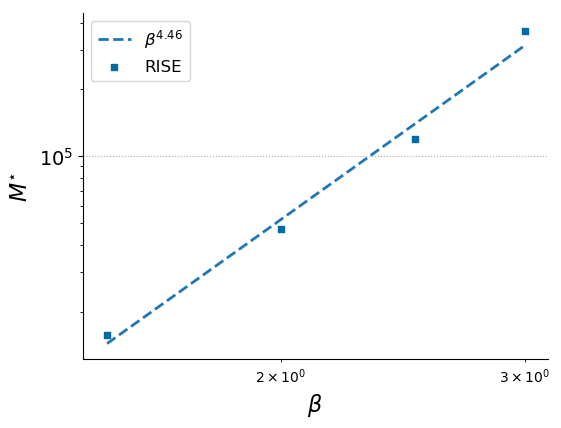

In [8]:
# M-Regime 
β_array = [1.0+0.5*i for i=1:4]
M_array = [15750,47250,120000,367500]

#xticks_array = 0.4:0.2:2.8

d_max = 4

#x = solve_exp_system(β_array[2:end],M_array[2:end],d_max)
x = solve_log_system(β_array[1:end],M_array[1:end],d_max)

figure(figsize=(6,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    

# Curve Fit
semilogy(β_array[1:end],exp(x[1])*(β_array[1:end].^(x[2])),linestyle="--",c=tableau20_r[1],linewidth=2,label=latexstring("\$\\beta^{",string(round(x[2],2)),"}\$"),zorder=1)

# Data
scatter(β_array,M_array,s=20,c=tableau20blind_r[1],marker="s",label="RISE")

ax[:set_yscale]("log")
ax[:set_xscale]("log")

#title("Ferromagnetic Lattice (M-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"M^{\star}",fontsize=16)
legend(fontsize=12)
#xticks(xticks_array,fontsize=14)
yticks(fontsize=14)
xticks(fontsize=14)
grid("on",linestyle="dotted")

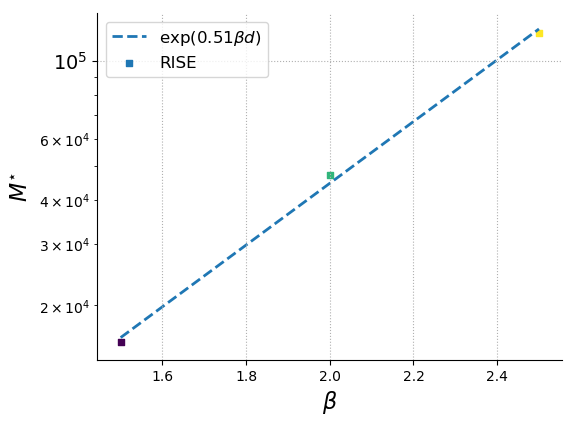

In [11]:
# M-Regime
β_array = [1.0+0.5*i for i=1:3]
M_array = [15750,47250,120000]

#xticks_array = 0.6:0.2:2.6

d_max = 4

x = solve_exp_system(β_array[1:end],M_array[1:end],d_max)

figure(figsize=(6,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    


# Curve Fit
semilogy(β_array[1:end],exp(x[1])*exp.(x[2]*β_array[1:end]*d_max),linestyle="--",c=tableau20_r[1],linewidth=2,label=latexstring("\$\\exp(",string(round(x[2],2)),"\\beta d)\$"),zorder=1)

# Data
scatter(β_array,M_array,s=20,c=tableau20blind_r[1],marker="s",label="RISE")

#ax[:set_yscale]("log")
#ax[:set_xscale]("log")

#title("Ferromagnetic Lattice with Weak Impurty (M-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"M^{\star}",fontsize=16)
legend(fontsize=12)
#xticks(xticks_array,fontsize=14)
yticks(fontsize=14)
grid("on",linestyle="dotted")

In [15]:
exp(x[1])*exp(x[2]*1.7*d_max)

24306.233516060394

## Ferro Lattices

### Figure A: Ferromagnetic model on lattice

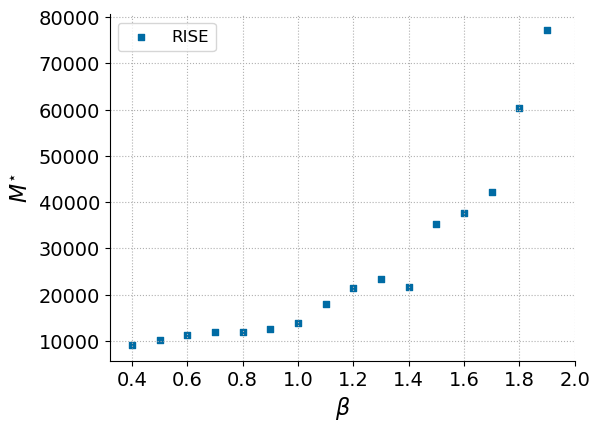

/Users/gogol/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [7]:
β_array = 0.4:0.1:1.9
M_array1 = [9100,10100,11150,11800,11900,12500,13950,17900,21350,23350,21550,35350,37700,42250,60400,77200]
xticks_array = 0.4:0.2:2.0

d_max = 4

figure(figsize=(6,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    
#semilogy(β_array,8500*log(6.5*β_array),"--k",linewidth=2,label="Curve Fit")

scatter(β_array,M_array1,s=20,c=tableau20blind_r[1],marker="s",label="RISE")

xlabel(L"\beta",fontsize=16)
ylabel(L"M^{\star}",fontsize=16)
legend(fontsize=12)
xticks(xticks_array,fontsize=14)
yticks(fontsize=14)
grid("on",linestyle="dotted")
savefig("FigA_M.eps", format="eps", dpi=300)

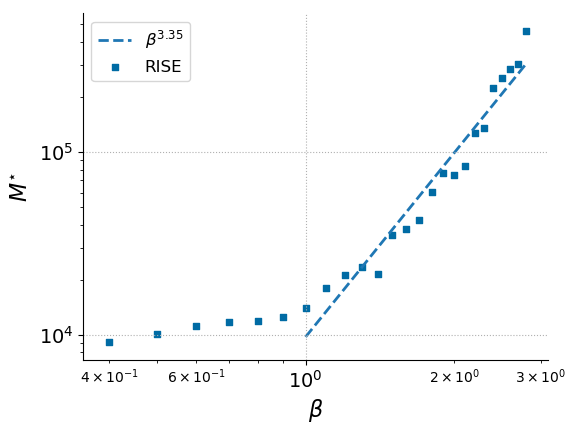

In [10]:
# M-Regime 
β_array = [0.4+0.1*i for i=0:24]
M_array = readdlm("FigA_M_Results.txt")

xticks_array = 0.4:0.2:2.8

d_max = 4

#x = solve_exp_system(β_array[2:end],M_array[2:end],d_max)
x = solve_log_system(β_array[7:end],M_array[7:end],d_max)

figure(figsize=(6,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    

# Curve Fit
semilogy(β_array[7:end],exp(x[1])*(β_array[7:end].^(x[2])),linestyle="--",c=tableau20_r[1],linewidth=2,label=latexstring("\$\\beta^{",string(round(x[2],2)),"}\$"),zorder=1)

# Data
scatter(β_array,M_array,s=20,c=tableau20blind_r[1],marker="s",label="RISE")

ax[:set_yscale]("log")
ax[:set_xscale]("log")

#title("Ferromagnetic Lattice (M-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"M^{\star}",fontsize=16)
legend(fontsize=12)
#xticks(xticks_array,fontsize=14)
yticks(fontsize=14)
xticks(fontsize=14)
grid("on",linestyle="dotted")

savefig("FigA_ME.eps", format="eps", dpi=300,bbox_inches="tight")

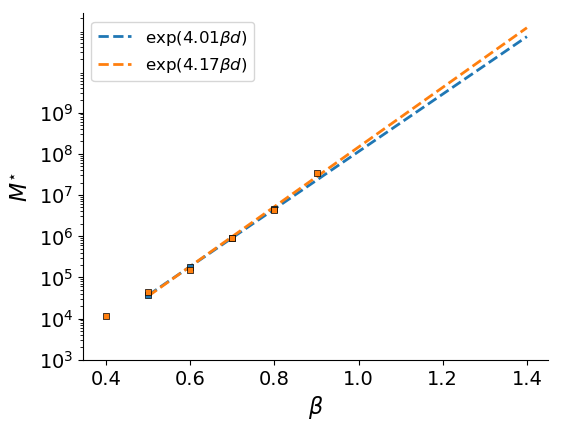

In [15]:
β_array = [0.4+0.1*i for i=0:10]

M_array1 = [37950,178850,892850,4688500]
M_array2 = [11550,43950,154750,890050,4429400,34203650]

yticks_array = 10.^(3:9)
xticks_array = [0.4+0.2*i for i=0:5]

d_max = 4

x1 = solve_exp_system(β_array[2:5],M_array1,d_max)
x2 = solve_exp_system(β_array[2:6],M_array2[2:6],d_max)

figure(figsize=(6,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary

# Curve fit to data
semilogy(β_array[2:end],exp(x1[1])*exp.(x1[2]*β_array[2:end]*d_max),linestyle="--",c=tableau20_r[1],linewidth=2,label=L"\exp(4.01\beta d)",zorder=1)
semilogy(β_array[2:end],exp(x2[1])*exp.(x2[2]*β_array[2:end]*d_max),linestyle="--",c=tableau20_r[3],linewidth=2,label=L"\exp(4.17\beta d)",zorder=1)

# Data
scatter(β_array[2:5],M_array1,s=20,c=tableau20_r[1],marker="s",edgecolor="k",linewidth=0.5, zorder=2)
scatter(β_array[1:6],M_array2,s=20,c=tableau20_r[3],marker="s",edgecolor="k",linewidth=0.5, zorder=2)

#title("Ferromagnetic Lattice (T-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"M^{\star}",fontsize=16)
legend(fontsize=12)
xticks(xticks_array,fontsize=14)
yticks(yticks_array,fontsize=14)
#grid("on")
savefig("FigA_T.eps", format="eps", dpi=300, bbox_inches="tight")

In [13]:
x1

2-element Array{Float64,1}:
 2.4878 
 4.01442

In [14]:
x2

2-element Array{Float64,1}:
 2.13041
 4.16707

### Figure C: Spin Glass Model

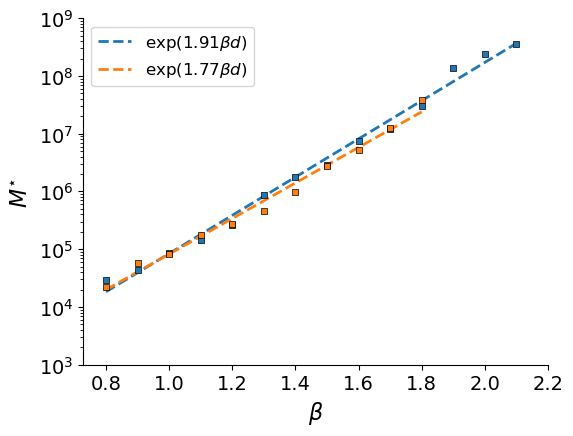

In [19]:
# T-Regime
β_array1 = [0.8+0.1*i for i=0:13]
M_array1 = [29850,44550,87550,141800,265850,852350,1762750,2856750,7541200,12221750,30727450,138737850,236091250,364406800]

β_array2 = [0.8+0.1*i for i=0:10]
M_array2 = [22400,58650,82110,178050,274750,467450,966700,2813150,5277750,12637150,38618750]

yticks_array = 10.^(3:9)
xticks_array = [0.8+0.2*i for i=0:7]

d_max = 4

x1 = solve_exp_system(β_array1,M_array1,d_max)
x2 = solve_exp_system(β_array2,M_array2,d_max)

figure(figsize=(6,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary

# Curve fit to data
semilogy(β_array1,exp(x1[1])*exp.(x1[2]*β_array1*d_max),linestyle="--",c=tableau20_r[1],linewidth=2,label=L"\exp(1.91\beta d)",zorder=1)
semilogy(β_array2,exp(x2[1])*exp.(x2[2]*β_array2*d_max),linestyle="--",c=tableau20_r[3],linewidth=2,label=L"\exp(1.77\beta d)",zorder=1)

# Data
scatter(β_array1,M_array1,s=20,c=tableau20_r[1],marker="s",edgecolor="k",linewidth=0.5, zorder=2)
scatter(β_array2,M_array2,s=20,c=tableau20_r[3],marker="s",edgecolor="k",linewidth=0.5, zorder=2)

#title("Ferromagnetic Lattice with Weak Impurty (T-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"M^{\star}",fontsize=16)
legend(fontsize=12)
xticks(xticks_array,fontsize=14)
yticks(yticks_array,fontsize=14)
#grid("on")
savefig("FigC_T.eps", format="eps", dpi=300)

In [17]:
x1

2-element Array{Float64,1}:
 3.71877
 1.9054 

In [18]:
x2

2-element Array{Float64,1}:
 4.22591
 1.7732 

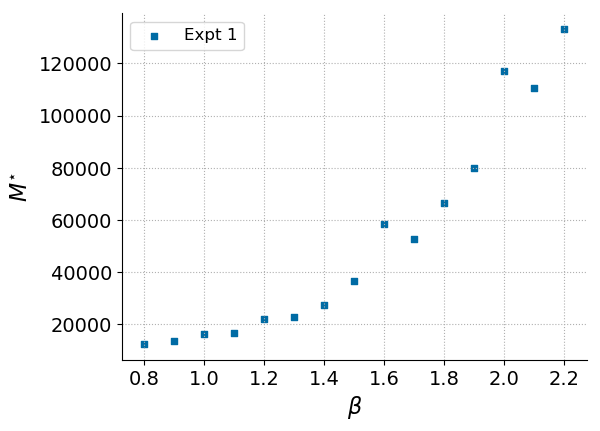

In [9]:
β_array = [0.8+0.1*i for i=0:14]
M_array = [12500,13550,16200,16850,22200,23000,27550,36450,58450,52605,66450,79950,117000,110550,133150]

yticks_array = 10.^(3:9)
xticks_array = [0.8+0.2*i for i=0:7]

d_max = 4

figure(figsize=(6,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    
#semilogy(β_array,8500*log(6.5*β_array),"--k",linewidth=2,label="Curve Fit")
scatter(β_array,M_array,s=20,c=tableau20blind_r[1],marker="s",label="Expt 1")
#title("Spin Glass Model (M-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"M^{\star}",fontsize=16)
legend(fontsize=12)
xticks(xticks_array,fontsize=14)
yticks(fontsize=14)
grid("on",linestyle="dotted")
savefig("FigC_M.eps", format="eps", dpi=300,bbox_inches="tight")

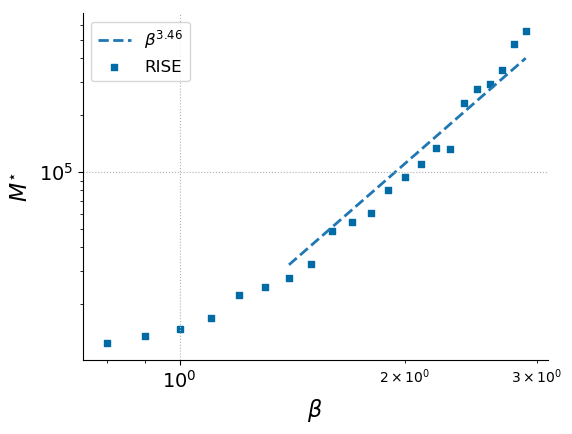

In [21]:
# M-Regime
β_array = [0.8 + 0.1*i for i=0:21]
M_array = readdlm("FigC_M_Results.txt")

xticks_array = 0.8:0.2:3.0

d_max = 3

x = solve_log_system(β_array[3:end],M_array[3:end],d_max)

figure(figsize=(6,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    

# Curve Fit
semilogy(β_array[7:end],exp(x[1])*(β_array[7:end].^(x[2])),linestyle="--",c=tableau20_r[1],linewidth=2,label=latexstring("\$\\beta^{",string(round(x[2],2)),"}\$"),zorder=1)

# Data
scatter(β_array,M_array,s=20,c=tableau20blind_r[1],marker="s",label="RISE")

ax[:set_yscale]("log")
ax[:set_xscale]("log")

#title("Ferromagnetic Lattice with Weak Impurty (M-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"M^{\star}",fontsize=16)
legend(fontsize=12)
#xticks(xticks_array,fontsize=14)
xticks(fontsize=14)
yticks(fontsize=14)
grid("on",linestyle="dotted")

#savefig("FigC_ME.eps", format="eps", dpi=300,bbox_inches="tight")

### Figure E: Ferromagnetic lattice with weak anti-ferro impurity

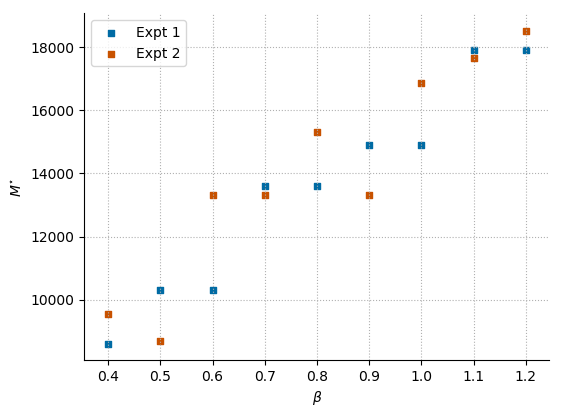

In [21]:
β_array = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]
M_array1 = [8600,10300,10300,13600,13600,14900,14900,17900,17900]
M_array2 = [9550,8700,13300,13300,15300,13300,16850,17650,18500]
d_max = 4

figure(figsize=(6,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    
#semilogy(β_array,8500*log(6.5*β_array),"--k",linewidth=2,label="Curve Fit")
scatter(β_array,M_array1,s=20,c=tableau20blind_r[1],marker="s",label="Expt 1")
scatter(β_array,M_array2,s=20,c=tableau20blind_r[6],marker="s",label="Expt 2")
#title("Ferromagnetic Lattice with Weak Impurty (M-regime)")
xlabel(L"\beta")
ylabel(L"M^{\star}")
legend()
xticks(0.4:0.1:1.2)
grid("on",linestyle="dotted")
savefig("FigE_M.eps", format="eps", dpi=300,bbox_inches="tight")

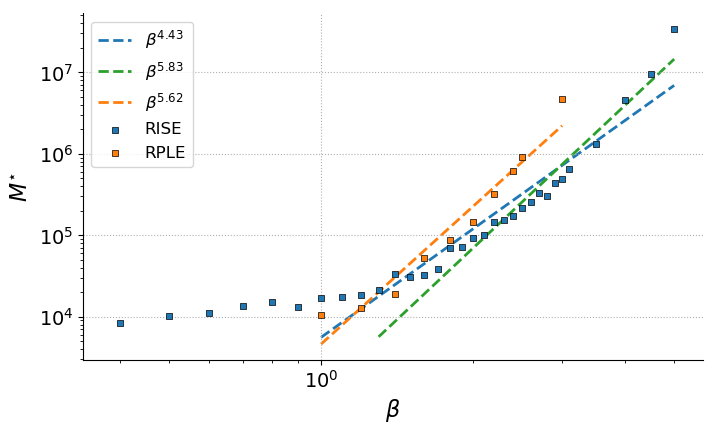

In [10]:
# M-Regime 
β_array = vcat([0.4+0.1*i for i=0:27],[3.5,4.0,4.5,5.0])
M_array = readdlm("FigE_M_Results.txt")

β_array_RPLE = vcat([1.0+0.2*i for i=0:7],[2.5,3.0])
M_array_RPLE = [10500,12800,18900,52700,87250,144400,321000,617550,916400,4678700]

xticks_array = 0.0:0.5:5.0

d_max = 4

x1 = solve_log_system(β_array[7:end],M_array[7:end],d_max)
x2 = solve_log_system(β_array[15:end],M_array[15:end],d_max)
x_RPLE = solve_log_system(β_array_RPLE,M_array_RPLE,d_max)

figure(figsize=(8,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    

# Curve Fit
PyPlot.plot(β_array[7:end],exp(x1[1])*(β_array[7:end].^(x1[2])),linestyle="--",c=tableau20_r[1],linewidth=2,label=latexstring("\$\\beta^{",string(round(x1[2],2)),"}\$"),zorder=1)
PyPlot.plot(β_array[10:end],exp(x2[1])*(β_array[10:end].^(x2[2])),linestyle="--",c=tableau20_r[5],linewidth=2,label=latexstring("\$\\beta^{",string(round(x2[2],2)),"}\$"),zorder=1)
PyPlot.plot(β_array_RPLE,exp(x_RPLE[1])*(β_array_RPLE.^(x_RPLE[2])),linestyle="--",c=tableau20_r[3],linewidth=2,label=latexstring("\$\\beta^{",string(round(x_RPLE[2],2)),"}\$"),zorder=1)

# Data
scatter(β_array,M_array,s=20,color=tableau20_r[1],marker="s",edgecolor="k",linewidth=0.5, label="RISE", zorder=2)
scatter(β_array_RPLE,M_array_RPLE,s=20,color=tableau20_r[3],marker="s",edgecolor="k",linewidth=0.5, label="RPLE", zorder=2)

ax[:set_yscale]("log")
ax[:set_xscale]("log")

#title("Ferromagnetic Lattice with Weak Impurty (M-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"M^{\star}",fontsize=16)
legend(fontsize=12)
#xticks(xticks_array,fontsize=14)
yticks(fontsize=14)
xticks(fontsize=14)
grid("on",linestyle="dotted")

#savefig("FigE_M2.eps", format="eps", dpi=300,bbox_inches="tight")

In [15]:
x

2-element Array{Float64,1}:
 9.2163 
 3.31536

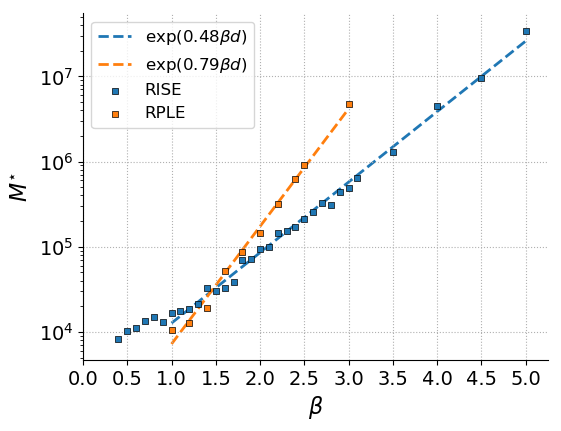

/Users/gogol/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [7]:
# M-Regime 
β_array = vcat([0.4+0.1*i for i=0:27],[3.5,4.0,4.5,5.0])
M_array = readdlm("FigE_M_Results.txt")

β_array_RPLE = vcat([1.0+0.2*i for i=0:7],[2.5,3.0])
M_array_RPLE = [10500,12800,18900,52700,87250,144400,321000,617550,916400,4678700]

xticks_array = 0.0:0.5:5.0

d_max = 4

x = solve_exp_system(β_array[7:end], M_array[7:end], d_max)
x_RPLE = solve_exp_system(β_array_RPLE, M_array_RPLE, d_max)

figure(figsize=(6,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    


# Curve Fit
semilogy(β_array[7:end],exp(x[1])*exp.(x[2]*β_array[7:end]*d_max),linestyle="--",c=tableau20_r[1],linewidth=2,label=latexstring("\$\\exp(",string(round(x[2],2)),"\\beta d)\$"),zorder=1)
semilogy(β_array_RPLE,exp(x_RPLE[1])*exp.(x_RPLE[2]*β_array_RPLE*d_max),linestyle="--",c=tableau20_r[3],linewidth=2,label=latexstring("\$\\exp(",string(round(x_RPLE[2],2)),"\\beta d)\$"),zorder=1)

# Data
scatter(β_array,M_array,s=20,color=tableau20_r[1],marker="s",edgecolor="k",linewidth=0.5, zorder=2, label="RISE")
scatter(β_array_RPLE,M_array_RPLE,s=20,color=tableau20_r[3],marker="s",edgecolor="k",linewidth=0.5, zorder=2, label="RPLE")

xlabel(L"\beta",fontsize=16)
ylabel(L"M^{\star}",fontsize=16)
legend(fontsize=12)
xticks(xticks_array,fontsize=14)
yticks(fontsize=14)
grid("on",linestyle="dotted")

savefig("FigE_ME2.eps", format="eps", dpi=300,bbox_inches="tight")

In [17]:
x

2-element Array{Float64,1}:
 7.74166 
 0.450785

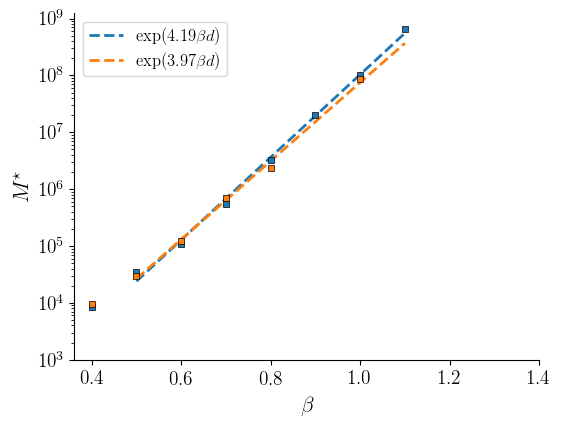

In [39]:
β_array1 = [0.4+0.1*i for i=0:7]
M_array1 = [8600,34300,106900,538400,3290400,20121600,101077550,655275350]

β_array2 = [0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
M_array2 = [9550, 29950, 121700, 699700, 2356850, 87567900]

yticks_array = 10.^(3:9)
xticks_array = [0.4+0.2*i for i=0:5]

d_max = 4

x1 = solve_exp_system(β_array1[2:end],M_array1[2:end],d_max)
x2 = solve_exp_system(β_array2[2:end],M_array2[2:end],d_max)

figure(figsize=(6,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary
# Curve fit to data
semilogy(β_array1[2:end],exp(x1[1])*exp.(x1[2]*β_array1[2:end]*d_max),linestyle="--",c=tableau20_r[1],linewidth=2,label=L"\exp(4.19\beta d)",zorder=1)
semilogy(β_array1[2:end],exp(x2[1])*exp.(x2[2]*β_array1[2:end]*d_max),linestyle="--",c=tableau20_r[3],linewidth=2,label=L"\exp(3.97\beta d)",zorder=1)

# Data
scatter(β_array1,M_array1,s=20,c=tableau20_r[1],marker="s",edgecolor="k",linewidth=0.5, zorder=2)
scatter(β_array2,M_array2,s=20,c=tableau20_r[3],marker="s",edgecolor="k",linewidth=0.5, zorder=2)

#title("Ferromagnetic Lattice with Weak Impurty (T-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"M^{\star}",fontsize=16)
legend(fontsize=12)
xticks(xticks_array,fontsize=14)
yticks(yticks_array,fontsize=14)
#grid("on")
savefig("FigE_T.eps", format="eps", dpi=300)

In [36]:
x1

2-element Array{Float64,1}:
 1.7114 
 4.18727

In [37]:
x2

2-element Array{Float64,1}:
 2.24228
 3.97391

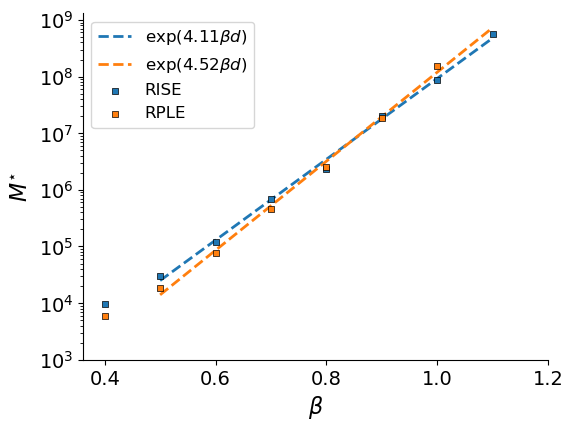

In [14]:
# T-Regime
#β_array1 = [0.4+0.1*i for i=0:7]
#M_array1 = [8600,34300,106900,538400,3290400,20121600,101077550,655275350]

β_array1 = [0.4+0.1*i for i=0:7]
M_array1 = [9550,29950,121700,699700,2356850,20063950,87567900,556339750]

β_array2 = [0.4+0.1*i for i=0:6]
M_array2 = [6000,18700,75600,455900,2500700,18389850,156568200]

yticks_array = 10.^(3:9)
xticks_array = [0.4+0.2*i for i=0:4]

d_max = 4

x1 = solve_exp_system(β_array1[2:end],M_array1[2:end],d_max)
x2 = solve_exp_system(β_array2[2:end],M_array2[2:end],d_max)

figure(figsize=(6,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary
# Curve fit to data
semilogy(β_array1[2:end],exp(x1[1])*exp.(x1[2]*β_array1[2:end]*d_max),linestyle="--",c=tableau20_r[1],linewidth=2,label=latexstring("\$\\exp(",string(round(x1[2],2)),"\\beta d)\$"),zorder=1)
semilogy(β_array1[2:end],exp(x2[1])*exp.(x2[2]*β_array1[2:end]*d_max),linestyle="--",c=tableau20_r[3],linewidth=2,label=latexstring("\$\\exp(",string(round(x2[2],2)),"\\beta d)\$"),zorder=1)

# Data
scatter(β_array1,M_array1,s=20,color=tableau20_r[1],marker="s",edgecolor="k",linewidth=0.5, zorder=2, label="RISE")
scatter(β_array2,M_array2,s=20,color=tableau20_r[3],marker="s",edgecolor="k",linewidth=0.5, zorder=2, label="RPLE")

#title("Ferromagnetic Lattice with Weak Impurty (T-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"M^{\star}",fontsize=16)
legend(fontsize=12)
xticks(xticks_array,fontsize=14)
yticks(yticks_array,fontsize=14)
#grid("on")
savefig("FigE_T2.eps", format="eps", dpi=300, bbox_inches="tight")

#### Plotting GMs

In [7]:
N = 16
d = 3
α = 0.4
β = 0.7

file_plot_gm = "FigA_gm.eps"
adj_matrix, struct_adj_matrix = ferro_lattice(N,α,β)
m = n = Int(sqrt(N))
draw_periodic_lattice(adj_matrix,m,n,α,β,file_plot_gm)

In [9]:
# Figure C
file_adj_matrix_gm = "adj_matrix_ferro_lattice_gm_C_T.txt"
adj_matrix = readdlm(file_adj_matrix_gm)
struct_adj_matrix = sign.(abs.(adj_matrix))
β = maximum(adj_matrix[:])

file_plot_gm = "FigC_gm.eps"
m = n = Int(sqrt(N))
draw_periodic_lattice(adj_matrix,m,n,α,β,file_plot_gm)

## Random Regular Graphs

### Figure B: Ferromagnetic model

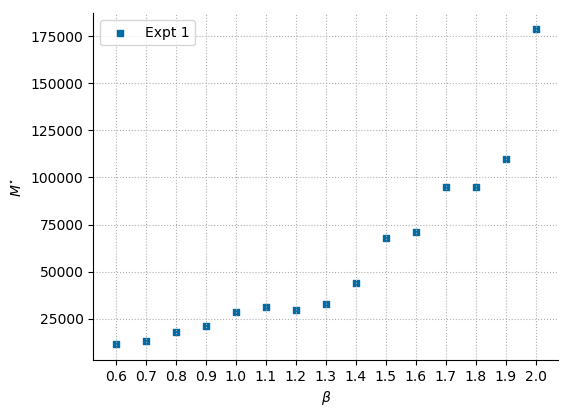

In [20]:
# M-Regime
β_array = 0.6:0.1:2.0
M_array1 = [11550,13300,17650,21350,28450,31300,29850,32850,43800,67650,71000,95050,95050,109950,178850]

d_max = 3

figure(figsize=(6,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    
#semilogy(β_array,8500*log(6.5*β_array),"--k",linewidth=2,label="Curve Fit")
scatter(β_array,M_array1,s=20,c=tableau20blind_r[1],marker="s",label="Expt 1")
#title("Ferromagnetic Lattice (M-regime)")
xlabel(L"\beta")
ylabel(L"M^{\star}")
legend()
xticks(0.6:0.1:2.0)
grid("on",linestyle="dotted")
savefig("FigB_M.eps", format="eps", dpi=300,bbox_inches="tight")

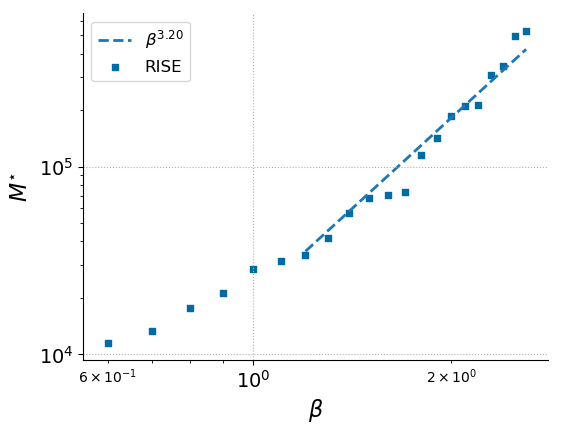

In [24]:
# M-Regime
β_array = [0.6 + 0.1*i for i=0:20]
M_array = readdlm("FigB_M_Results.txt")

xticks_array = 0.6:0.2:2.6

d_max = 3

x = solve_log_system(β_array[5:end],M_array[5:end],d_max)

figure(figsize=(6,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    
#semilogy(β_array,8500*log(6.5*β_array),"--k",linewidth=2,label="Curve Fit")
#scatter(β_array,M_array,s=20,c=tableau20blind_r[1],marker="s",label="RISE")

# Curve Fit
#semilogy(β_array[2:end],exp(x[1])*exp.(x[2]*β_array[2:end]*d_max),linestyle="--",c=tableau20_r[1],linewidth=2,label=L"\exp(4.19\beta d)",zorder=1)
semilogy(β_array[7:end],exp(x[1])*(β_array[7:end].^(x[2])),linestyle="--",c=tableau20_r[1],linewidth=2,label=L"\beta^{3.20}",zorder=1)

# Data
scatter(β_array,M_array,s=20,c=tableau20blind_r[1],marker="s",label="RISE")

ax[:set_yscale]("log")
ax[:set_xscale]("log")

#title("Ferromagnetic Lattice with Weak Impurty (M-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"M^{\star}",fontsize=16)
legend(fontsize=12)
#xticks(xticks_array,fontsize=14)
xticks(fontsize=14)
yticks(fontsize=14)
grid("on",linestyle="dotted")

savefig("FigB_ME.eps", format="eps", dpi=300,bbox_inches="tight")

In [71]:
x

2-element Array{Float64,1}:
 9.89076
 3.20387

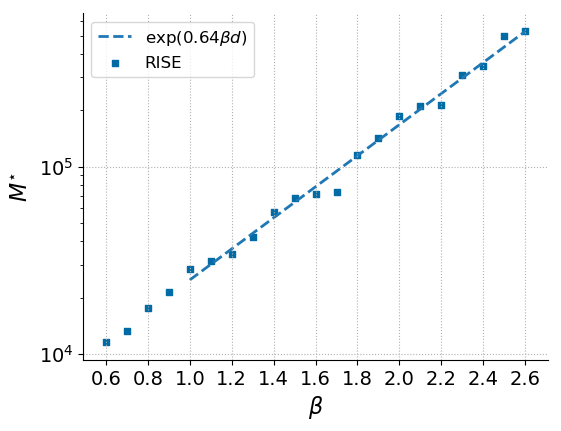

In [9]:
# M-Regime
β_array = [0.6 + 0.1*i for i=0:20]
M_array = readdlm("FigB_M_Results.txt")

xticks_array = 0.6:0.2:2.6

d_max = 3

x = solve_exp_system(β_array[5:end],M_array[5:end],d_max)

figure(figsize=(6,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    


# Curve Fit
semilogy(β_array[5:end],exp(x[1])*exp.(x[2]*β_array[5:end]*d_max),linestyle="--",c=tableau20_r[1],linewidth=2,label=latexstring("\$\\exp(",string(round(x[2],2)),"\\beta d)\$"),zorder=1)

# Data
scatter(β_array,M_array,s=20,c=tableau20blind_r[1],marker="s",label="RISE")

#ax[:set_yscale]("log")
#ax[:set_xscale]("log")

#title("Ferromagnetic Lattice with Weak Impurty (M-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"M^{\star}",fontsize=16)
legend(fontsize=12)
xticks(xticks_array,fontsize=14)
yticks(fontsize=14)
grid("on",linestyle="dotted")

savefig("FigB_ME2.eps", format="eps", dpi=300,bbox_inches="tight")

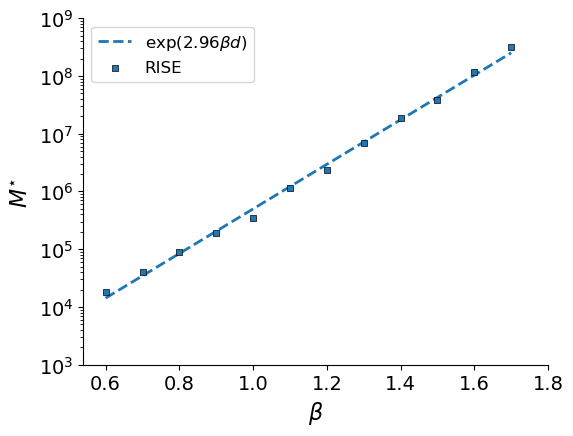

In [8]:
# T-Regime
#β_array1 = [0.6+0.1*i for i=0:13]
#M_array1 = [18500,38850,99000,240600,505250,1169750,2339500,6583650,16004800,45040550,132970850,307860650,712774300,2106184350]

β_array2 = [0.6+0.1*i for i=0:11]
M_array2 = [18500,39900,90700,187300,351250,1126400,2329650,6779900,18792650,38871200,118790700,313596350]

yticks_array = 10.^(3:9)
xticks_array = [0.6+0.2*i for i=0:6]
d_max = 3

#x1 = solve_exp_system(β_array1,M_array1,d_max)
x2 = solve_exp_system(β_array2,M_array2,d_max)

figure(figsize=(6,4.5))
#rc("text", usetex=true)
#rc("font", family="sans-serif")
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary

# Curve fit to data
#semilogy(β_array1,exp(x1[1])*exp.(x1[2]*β_array1*d_max),linestyle="--",c=tableau20_r[1],linewidth=2,label=L"\exp(2.98\beta d)",zorder=1)
semilogy(β_array2,exp(x2[1])*exp.(x2[2]*β_array2*d_max),linestyle="--",c=tableau20_r[1],linewidth=2,label=latexstring("\$\\exp(",string(round(x2[2],2)),"\\beta d)\$"),zorder=1)

# Data
#scatter(β_array1,M_array1,s=20,c=tableau20_r[1],marker="s",edgecolor="k",linewidth=0.5, zorder=2)
scatter(β_array2,M_array2,s=20,color=tableau20_r[1],marker="s",edgecolor="k",linewidth=0.5, label="RISE",zorder=2)

#title("Ferromagnetic Lattice (T-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"M^{\star}",fontsize=16)
legend(fontsize=12)
xticks(xticks_array,fontsize=14)
yticks(yticks_array,fontsize=14)
#grid("on")
savefig("FigB_T2.eps", format="eps", dpi=300,bbox_inches="tight")

In [24]:
x1

2-element Array{Float64,1}:
 4.24525
 2.9836 

In [25]:
x2

2-element Array{Float64,1}:
 4.34635
 2.92225

### Figure D: Spin Glass Model

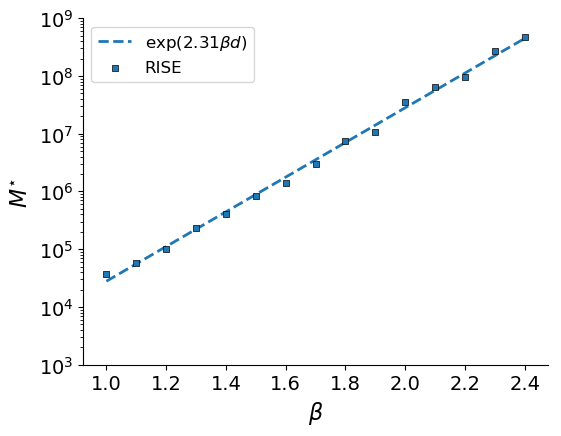

In [10]:
#β_array1 = [1.0+0.1*i for i=0:14]
#M_array1 = [37950,82200,154000,261800,490650,1064400,2199300,3925750,7357800,15963900,28495550,60775300,108483900,213492150,591185250]

β_array2 = [1.0+0.1*i for i=0:14]
M_array2 = [37950,58500,99400,237750,404450,836350,1423100,2943350,7399950,10877900,34904750,65485800,96264100,266834450,476778050]

yticks_array = 10.^(3:9)
xticks_array = 1.0:0.2:2.4
d_max = 3

#x1 = solve_exp_system(β_array1,M_array1,d_max)
x2 = solve_exp_system(β_array2,M_array2,d_max)

figure(figsize=(6,4.5))
#rc("text", usetex=true)
#rc("font", family="sans-serif")
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary

# Curve fit to data
#semilogy(β_array1,exp(x1[1])*exp.(x1[2]*β_array1*d_max),linestyle="--",c=tableau20_r[1],linewidth=2,label=L"\exp(2.23\beta d)",zorder=1)
semilogy(β_array2,exp(x2[1])*exp.(x2[2]*β_array2*d_max),linestyle="--",c=tableau20_r[1],linewidth=2,label=latexstring("\$\\exp(",string(round(x2[2],2)),"\\beta d)\$"),zorder=1)

# Data
#scatter(β_array1,M_array1,s=20,c=tableau20_r[1],marker="s",edgecolor="k",linewidth=0.5, zorder=2)
scatter(β_array2,M_array2,s=20,color=tableau20_r[1],marker="s",edgecolor="k",linewidth=0.5, label="RISE",zorder=2)

#title("Spin Glass Model (T-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"M^{\star}",fontsize=16)
legend(fontsize=12)
xticks(xticks_array,fontsize=14)
yticks(yticks_array,fontsize=14)
#grid("on")
savefig("FigD_T.eps", format="eps", dpi=300,bbox_inches="tight")

In [28]:
x1

2-element Array{Float64,1}:
 3.80513
 2.23969

In [29]:
x2

2-element Array{Float64,1}:
 3.54911
 2.24978

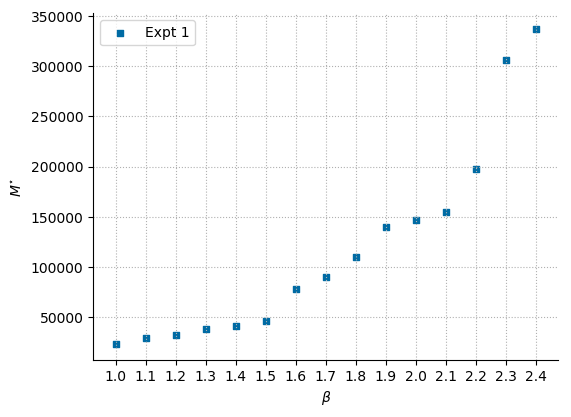

In [22]:
β_array = [1.0+0.1*i for i=0:14]
M_array1 = [23500,29850,32850,37950,41750,45950,78250,90550,109950,140200,147200,154550,197100,305600,336850]

d_max = 3

figure(figsize=(6,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    
#semilogy(β_array,8500*log(6.5*β_array),"--k",linewidth=2,label="Curve Fit")
scatter(β_array,M_array1,s=20,c=tableau20blind_r[1],marker="s",label="Expt 1")
#title("Spin Glass Model (M-regime)")
xlabel(L"\beta")
ylabel(L"M^{\star}")
legend()
xticks(β_array)
grid("on",linestyle="dotted")
savefig("FigD_M.eps", format="eps", dpi=300,bbox_inches="tight")

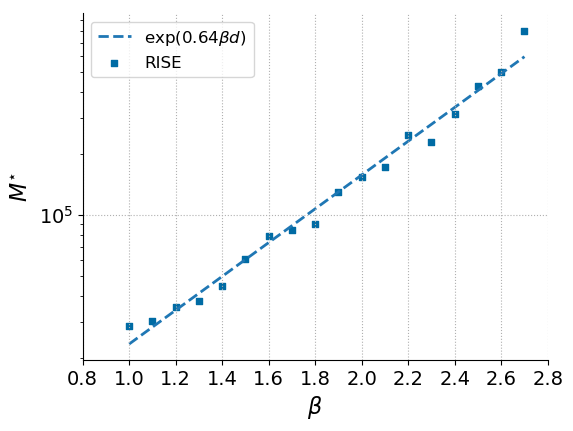

In [12]:
# M-Regime 
β_array = [1.0+0.1*i for i=0:17]
M_array = readdlm("FigD_M_Results.txt")

xticks_array = 0.8:0.2:2.8

d_max = 3

x = solve_exp_system(β_array,M_array,d_max)

figure(figsize=(6,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    


# Curve Fit
semilogy(β_array,exp(x[1])*exp.(x[2]*β_array*d_max),linestyle="--",c=tableau20_r[1],linewidth=2,label=latexstring("\$\\exp(",string(round(x[2],2)),"\\beta d)\$"),zorder=1)

# Data
scatter(β_array,M_array,s=20,c=tableau20blind_r[1],marker="s",label="RISE")

#ax[:set_yscale]("log")
#ax[:set_xscale]("log")

#title("Ferromagnetic Lattice with Weak Impurty (M-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"M^{\star}",fontsize=16)
legend(fontsize=12)
xticks(xticks_array,fontsize=14)
yticks(fontsize=14)
grid("on",linestyle="dotted")

savefig("FigD_ME2.eps", format="eps", dpi=300,bbox_inches="tight")

### Figure F: Ferromagnetic model with weak antiferromagnetic impurity

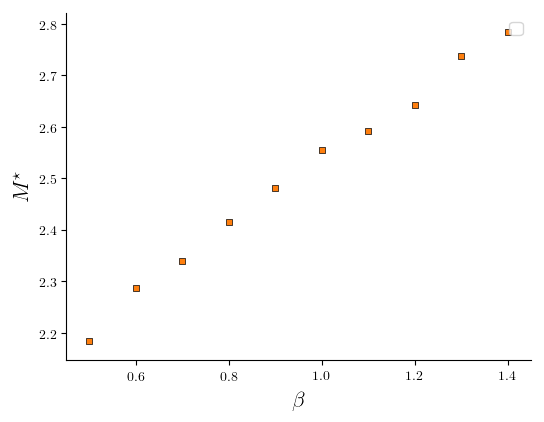

PyObject <matplotlib.legend.Legend object at 0x13cb884d0>

In [41]:
β_array2 = [0.5+0.1*i for i=0:9]
M_array2 = [7250,18750,31800,72200,156550,393200,637200,1255050,5138900,10629300]

yticks_array = 10.^(3:9)
xticks_array = 0.4:0.2:1.4
d_max = 3

x2 = solve_exp_system(β_array2,M_array2,d_max)

figure(figsize=(6,4.5))
rc("text", usetex=true)
rc("font", family="sans-serif")
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary

# Data
scatter(β_array2,log.(log.(M_array2)),s=20,c=tableau20_r[3],marker="s",edgecolor="k",linewidth=0.5, zorder=2)

#title("Spin Glass Model (T-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"M^{\star}",fontsize=16)
legend(fontsize=12)
#xticks(xticks_array,fontsize=14)
#yticks(yticks_array,fontsize=14)
#grid("on")
#savefig("FigF_T.eps", format="eps", dpi=300,bbox_inches="tight")

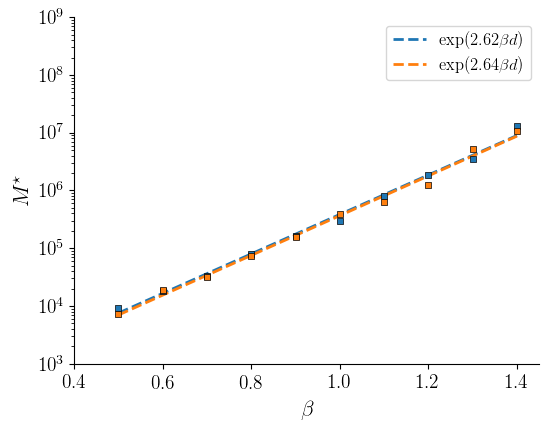

In [34]:
β_array1 = [0.5+0.1*i for i=0:9]
M_array1 = [9100,17850,33400,79650,164500,293600,812750,1851450,3470000,12876350]

β_array2 = [0.5+0.1*i for i=0:9]
M_array2 = [7250,18750,31800,72200,156550,393200,637200,1255050,5138900,10629300]

yticks_array = 10.^(3:9)
xticks_array = 0.4:0.2:1.4
d_max = 3

x1 = solve_exp_system(β_array1,M_array1,d_max)
x2 = solve_exp_system(β_array2,M_array2,d_max)

figure(figsize=(6,4.5))
rc("text", usetex=true)
rc("font", family="sans-serif")
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary

# Curve fit to data
semilogy(β_array1,exp(x1[1])*exp.(x1[2]*β_array1*d_max),linestyle="--",c=tableau20_r[1],linewidth=2,label=L"\exp(2.62\beta d)",zorder=1)
semilogy(β_array2,exp(x2[1])*exp.(x2[2]*β_array2*d_max),linestyle="--",c=tableau20_r[3],linewidth=2,label=L"\exp(2.64\beta d)",zorder=1)

# Data
scatter(β_array1,M_array1,s=20,c=tableau20_r[1],marker="s",edgecolor="k",linewidth=0.5, zorder=2)
scatter(β_array2,M_array2,s=20,c=tableau20_r[3],marker="s",edgecolor="k",linewidth=0.5, zorder=2)

#title("Spin Glass Model (T-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"M^{\star}",fontsize=16)
legend(fontsize=12)
xticks(xticks_array,fontsize=14)
yticks(yticks_array,fontsize=14)
#grid("on")
savefig("FigF_T.eps", format="eps", dpi=300,bbox_inches="tight")

In [32]:
x1

2-element Array{Float64,1}:
 4.99412
 2.62236

In [33]:
x2

2-element Array{Float64,1}:
 4.88908
 2.64118

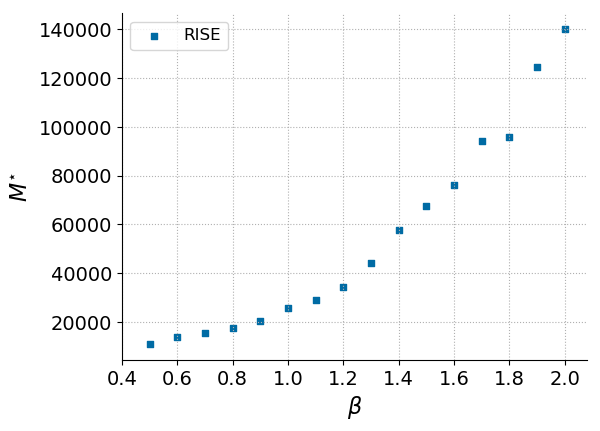

/Users/gogol/.julia/v0.6/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [7]:
β_array = [0.5+0.1*i for i=0:15]
M_array = [11000,14050,15600,17400,20350,25550,29200,34250,44250,57550,67750,76050,94100,95950,124650,140150]
#yticks_array = 10.^(3:9)
xticks_array = 0.4:0.2:2.0
d_max = 3

d_max = 3

figure(figsize=(6,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    
#semilogy(β_array,8500*log(6.5*β_array),"--k",linewidth=2,label="Curve Fit")
scatter(β_array,M_array,s=20,c=tableau20blind_r[1],marker="s",label="RISE")
#title("Spin Glass Model (M-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"M^{\star}",fontsize=16)
legend(fontsize=12)
xticks(xticks_array,fontsize=14)
yticks(fontsize=14)
grid("on",linestyle="dotted")
savefig("FigF_M.eps", format="eps", dpi=300,bbox_inches="tight")

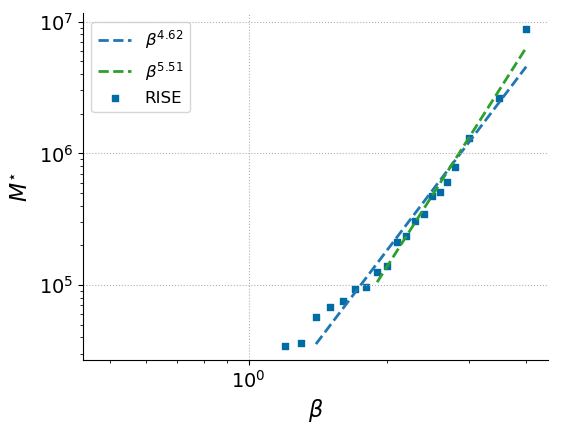

In [12]:
# M-Regime 
β_array = vcat([0.5+0.1*i for i=0:23],[3.0,3.5,4.0])
M_array = readdlm("FigF_M_Results.txt")

xticks_array = 0.5:0.5:4.0

d_max = 3

#x = solve_exp_system(β_array[2:end],M_array[2:end],d_max)
x1 = solve_log_system(β_array[10:end],M_array[10:end],d_max)
x2 = solve_log_system(β_array[15:end],M_array[15:end],d_max)

figure(figsize=(6,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    

# Curve Fit
PyPlot.plot(β_array[10:end],exp(x1[1])*(β_array[10:end].^(x1[2])),linestyle="--",c=tableau20_r[1],linewidth=2,label=latexstring("\$\\beta^{",string(round(x1[2],2)),"}\$"),zorder=1)
PyPlot.plot(β_array[15:end],exp(x2[1])*(β_array[15:end].^(x2[2])),linestyle="--",c=tableau20_r[5],linewidth=2,label=latexstring("\$\\beta^{",string(round(x2[2],2)),"}\$"),zorder=1)

# Data
scatter(β_array,M_array,s=20,c=tableau20blind_r[1],marker="s",label="RISE")

ax[:set_yscale]("log")
ax[:set_xscale]("log")

#title("Ferromagnetic Lattice with Weak Impurty (M-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"M^{\star}",fontsize=16)
legend(fontsize=12)
#xticks(xticks_array,fontsize=14)
yticks(fontsize=14)
xticks(fontsize=14)
grid("on",linestyle="dotted")

#savefig("FigF_ME.eps", format="eps", dpi=300,bbox_inches="tight")

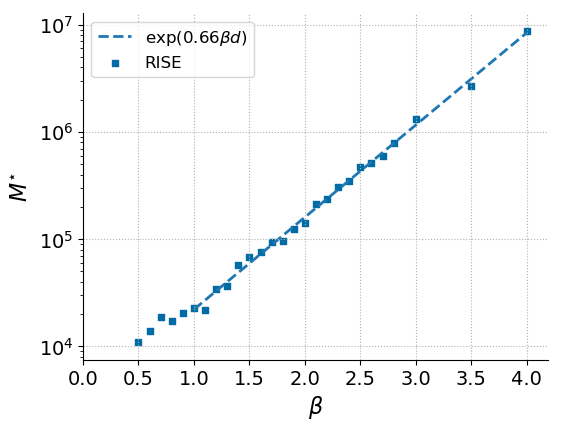

In [8]:
# M-Regime 
β_array = vcat([0.5+0.1*i for i=0:23],[3.0,3.5,4.0])
M_array = readdlm("FigF_M_Results.txt")

xticks_array = 0.0:0.5:4.0

d_max = 3

x = solve_exp_system(β_array[6:end],M_array[6:end],d_max)

figure(figsize=(6,4.5))
ax=subplot(111)
ax[:spines]["top"][:set_color]("none") # Remove the top axis boundary
ax[:spines]["right"][:set_color]("none") # Remove the right axis boundary    


# Curve Fit
semilogy(β_array[6:end],exp(x[1])*exp.(x[2]*β_array[6:end]*d_max),linestyle="--",c=tableau20_r[1],linewidth=2,label=latexstring("\$\\exp(",string(round(x[2],2)),"\\beta d)\$"),zorder=1)

# Data
scatter(β_array,M_array,s=20,c=tableau20blind_r[1],marker="s",label="RISE")

#ax[:set_yscale]("log")
#ax[:set_xscale]("log")

#title("Ferromagnetic Lattice with Weak Impurty (M-regime)")
xlabel(L"\beta",fontsize=16)
ylabel(L"M^{\star}",fontsize=16)
legend(fontsize=12)
xticks(xticks_array,fontsize=14)
yticks(fontsize=14)
grid("on",linestyle="dotted")

savefig("FigF_ME2.eps", format="eps", dpi=300,bbox_inches="tight")

#### Plots of Graphical Models

In [26]:
N = 16
d = 3
α = 0.4

# Figure D
file_adj_matrix_gm = "spin_glass_random_regular_adj_matrix.txt"
file_plot_gm = "FigD_gm.eps"

adj_matrix = readdlm(file_adj_matrix_gm)
struct_adj_matrix = sign.(abs.(adj_matrix))
β = maximum(adj_matrix[:])

gm = Junet.Graph(struct_adj_matrix,directed=false)

layout_FigD = layout_fruchterman_reingold(gm)

h = Junet.plot(gm, size=(300,300), layout=layout_FigD, node_color="white", node_border_color="black",
    node_border_width=2, edge_color=[edge_color_gm(i, adj_matrix, α, β) for i = 1:edgecount(gm)],
    edge_width=3, format=:eps, file=file_plot_gm)

In [27]:
# Figure B
FLAG_weak_impurity = false
file_adj_matrix_gm = "spin_glass_random_regular_adj_matrix.txt"
file_plot_gm = "FigB_gm.eps"

adj_matrix = readdlm(file_adj_matrix_gm)
struct_adj_matrix = sign.(abs.(adj_matrix))
β = maximum(adj_matrix[:])

U_temp_adj_matrix = triu(struct_adj_matrix)

# adj_matrix is a sparse matrix
R, C, V = findnz(U_temp_adj_matrix)
V = β*V

# one random index to change to -α
ind_α = 8
if FLAG_weak_impurity
    V[ind_α] = -α
else
    V[ind_α] = α
end

U_adj_matrix = sparse(R, C, V, N, N)
adj_matrix = U_adj_matrix + U_adj_matrix'
adj_matrix = Array(adj_matrix)

gm = Junet.Graph(struct_adj_matrix,directed=false)

h = Junet.plot(gm, size=(300,300), layout=layout_FigD, node_color="white", node_border_color="black",
    node_border_width=2, edge_color=[edge_color_gm(i, adj_matrix, α, β) for i = 1:edgecount(gm)],
    edge_width=3, format=:eps, file=file_plot_gm)

In [28]:
# Figure F
FLAG_weak_impurity = true
file_adj_matrix_gm = "spin_glass_random_regular_adj_matrix.txt"
file_plot_gm = "FigF_gm.eps"

adj_matrix = readdlm(file_adj_matrix_gm)
struct_adj_matrix = sign.(abs.(adj_matrix))
β = maximum(adj_matrix[:])

U_temp_adj_matrix = triu(struct_adj_matrix)

# adj_matrix is a sparse matrix
R, C, V = findnz(U_temp_adj_matrix)
V = β*V

# one random index to change to -α
ind_α = 8
if FLAG_weak_impurity
    V[ind_α] = -α
else
    V[ind_α] = α
end

U_adj_matrix = sparse(R, C, V, N, N)
adj_matrix = U_adj_matrix + U_adj_matrix'
adj_matrix = Array(adj_matrix)

gm = Junet.Graph(struct_adj_matrix,directed=false)

h = Junet.plot(gm, size=(300,300), layout=layout_FigD, node_color="white", node_border_color="black",
    node_border_width=2, edge_color=[edge_color_gm(i, adj_matrix, α, β) for i = 1:edgecount(gm)],
    edge_width=3, format=:eps, file=file_plot_gm)